<a href="https://colab.research.google.com/github/maxashoka3/Machine-learing-proj/blob/master/Credit_card_Frud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [4]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Copy of creditcard.csv')

In [5]:
#checking the shape of our data
data.shape

(56962, 30)

In [6]:
# Checking the distribution of two classes in the target variable
data.Target.value_counts()

0    56864
1       98
Name: Target, dtype: int64

Clearly the dataset is heavily imbalance

In [8]:
data.tail().T

,56957,56958,56959,56960,56961
V1,2.030797,-0.263947,2.206867,1.430579,-7.792712
V2,-0.825073,1.119700,-0.748559,-0.842354,5.599937
V3,-0.729555,-0.639394,-1.443015,0.415998,0.258943
V4,-0.519187,-0.880567,-1.101542,-1.328439,0.061360
V5,-0.639893,1.194120,-0.332197,-1.284654,-2.586555
V6,-0.169482,-0.310693,-0.646931,-0.888110,4.770837
V7,-0.619049,0.962087,-0.536272,-0.653237,-8.221863
V8,-0.017902,-0.088880,-0.129437,-0.238164,-20.298380
V9,-0.578643,0.386664,-0.712381,-2.220845,2.028566
V10,0.915645,0.195362,1.057616,1.350845,-0.030694


In [9]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]
# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [13]:
# Split the dataset into train and test using stratified sampling on our dependent variable
# Using a stratified sampling ensures the distribution of dependent variable remains same across train and test datasets



In [12]:
# Spliting the dataset into Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                           test_size = 0.2, 
                                           random_state = 0,
                                           stratify = Y)

In [14]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(45569, 29)

 The shape of test dataset :
(11393, 29)


In [15]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    45491
1       78
Name: Target, dtype: int64

 Distribution of classes of dependent variable in test :
0    11373
1       20
Name: Target, dtype: int64


In [16]:
# hyperparameter tuning

classifier = RandomForestClassifier()
grid_values = {'n_estimators' : [50,80,100],'max_depth' : [3,5,7]}
classifier = GridSearchCV(classifier, 
                          param_grid = grid_values,
                          scoring = 'roc_auc',
                          cv = 5)
# Fit the object to train dataset
classifier.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='roc_auc')

Predicting on both train and test dataset using the fitted model

In [17]:
train_preds = classifier.predict(X_train)
test_preds = classifier.predict(X_test)

In [18]:
#Obtain accuracy on train set
accuracy_score(Y_train, train_preds)

0.9996269393666747

In [19]:
# Obtain accuracy on test set
accuracy_score(Y_test, test_preds)

0.9994733608356008

Accuracy is not a good metric to evaluate our model since the dataset is heavily imbalanced. Thus we will use roc_auc score

In [20]:
# Calculate roc_auc score on train set
roc_auc_score(Y_train,train_preds)

0.891025641025641

In [21]:
# Calculate roc_auc score on test set
roc_auc_score(Y_test,test_preds)

0.8749560362261496

In [22]:
# Obtain the confusion matrix on train set
confusion_matrix(Y_train,train_preds)

array([[45491,     0],
       [   17,    61]])

In [23]:
# Obtain the confusion matrix on test set
confusion_matrix(Y_test,test_preds)

array([[11372,     1],
       [    5,    15]])

In [32]:
#Extract feature importances
importances = classifier.best_estimator_.feature_importances_

In [30]:
importances

array([0.00700217, 0.01142833, 0.01202563, 0.02579885, 0.00946869,
       0.02363684, 0.01335583, 0.01325941, 0.03893095, 0.05717411,
       0.06720042, 0.08205019, 0.00845753, 0.16784992, 0.00608925,
       0.07904741, 0.23646165, 0.04157378, 0.01042496, 0.01234373,
       0.01090411, 0.00409862, 0.00792384, 0.00286451, 0.0064665 ,
       0.01331012, 0.01828073, 0.00671641, 0.00585551])

In [44]:
# Plot the varaible importance
features = X_train.columns
importances = classifier.best_estimator_.feature_importances_
indices = np.argsort(importances)

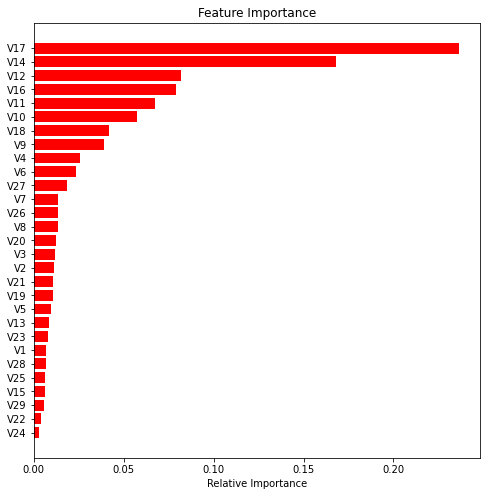

In [45]:
# Ploting the Feature Importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()